In [7]:

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [8]:
combi = df_train.append(df_test, ignore_index=True)



C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [13]:
combi['tweet'].dtype




dtype('O')

In [15]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'].astype(str), "@[\w]*")

In [16]:
combi.head()


,sentiment,tweet,tweet_id,tidy_tweet
0,1.0,#sxswnui #sxsw #apple defining language of tou...,1701,#sxswnui #sxsw #apple defining language of tou...
1,1.0,Learning ab Google doodles! All doodles should...,1851,Learning ab Google doodles! All doodles should...
2,2.0,one of the most in-your-face ex. of stealing t...,2689,one of the most in-your-face ex. of stealing t...
3,0.0,This iPhone #SXSW app would b pretty awesome i...,4525,This iPhone #SXSW app would b pretty awesome i...
4,1.0,Line outside the Apple store in Austin waiting...,3604,Line outside the Apple store in Austin waiting...


In [17]:
# tokenize the tweet after removing @
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#sxswnui, #sxsw, #apple, defining, language, ...
1    [Learning, ab, Google, doodles!, All, doodles,...
2    [one, of, the, most, in-your-face, ex., of, st...
3    [This, iPhone, #SXSW, app, would, b, pretty, a...
4    [Line, outside, the, Apple, store, in, Austin,...
Name: tidy_tweet, dtype: object

In [18]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [19]:
combi.head()

,sentiment,tweet,tweet_id,tidy_tweet
0,1.0,#sxswnui #sxsw #apple defining language of tou...,1701,#sxswnui #sxsw #apple defining language of tou...
1,1.0,Learning ab Google doodles! All doodles should...,1851,Learning ab Google doodles! All doodles should...
2,2.0,one of the most in-your-face ex. of stealing t...,2689,one of the most in-your-face ex. of stealing t...
3,0.0,This iPhone #SXSW app would b pretty awesome i...,4525,This iPhone #SXSW app would b pretty awesome i...
4,1.0,Line outside the Apple store in Austin waiting...,3604,Line outside the Apple store in Austin waiting...


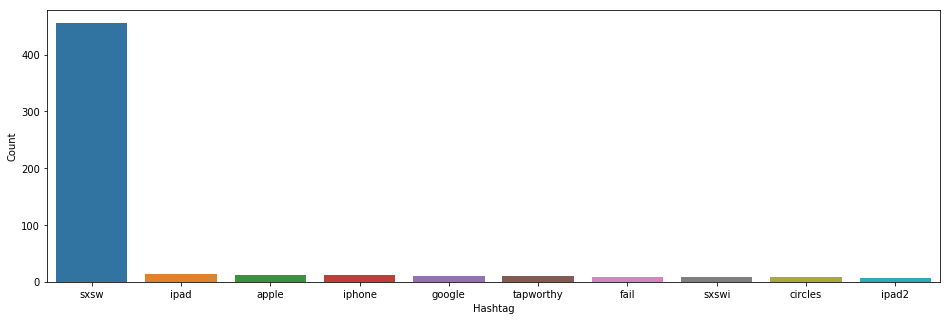

In [55]:
# extracting hashtags from negative catergory

HT_neg = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 0.0])
HT_neg = sum(HT_neg,[])
HT_neg = [item.lower() for item in HT_neg]

a = nltk.FreqDist(HT_neg)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


In [54]:
set(HT_neg)



{'100tc',
 '11ntc',
 '2',
 '310409h2011',
 'abacus',
 'adpeopleproblems',
 'amateurhour',
 'android',
 'annoying',
 'apple',
 'appleatxdt',
 'apps',
 'at',
 'austin',
 'batterykiller',
 'bettersearch',
 'bing',
 'blackberry',
 'ces',
 'checkins',
 'circles',
 'cnn',
 'cnngrill',
 'comments',
 'confusion',
 'conversation',
 'coronasdk',
 'crashing',
 'crowded',
 'csr',
 'cstejas',
 'csuitecsourcing',
 'digitalluxury',
 'diller',
 'drumbeat',
 'dyac',
 'enchantment',
 'fab5',
 'fail',
 'fb',
 'fh',
 'flip',
 'flipboard',
 'fml',
 'fuckit',
 'futuremf',
 'futureoftouch',
 'gamestorming',
 'google',
 'googledoodles',
 'gr2l2',
 'groupme',
 'gswsxsw',
 'guykawasaki',
 'hacknews',
 'help',
 'hereforwork',
 'idontbelieve',
 'illmakeitwork',
 'imaconf',
 'imthatgood',
 'ipad',
 'ipad2',
 'ipaddesignheadaches',
 'iphone',
 'iphone5',
 'japan',
 'jpmobilesummit',
 'justsayin',
 'kawasaki',
 'kids',
 'latinasintech',
 'latism',
 'leanstartup',
 'libraries',
 'longlinesbadux',
 'media',
 'microfor

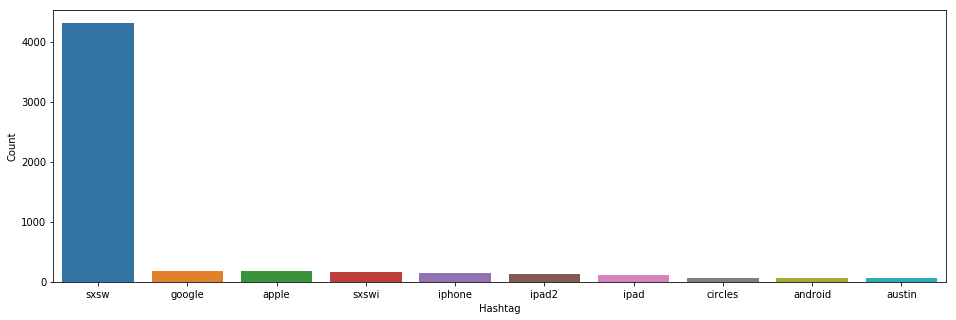

In [56]:
# extracting hashtags from neutral catergory

HT_neutral = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 1.0])
HT_neutral = sum(HT_neutral,[])
HT_neutral = [item.lower() for item in HT_neutral]

a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


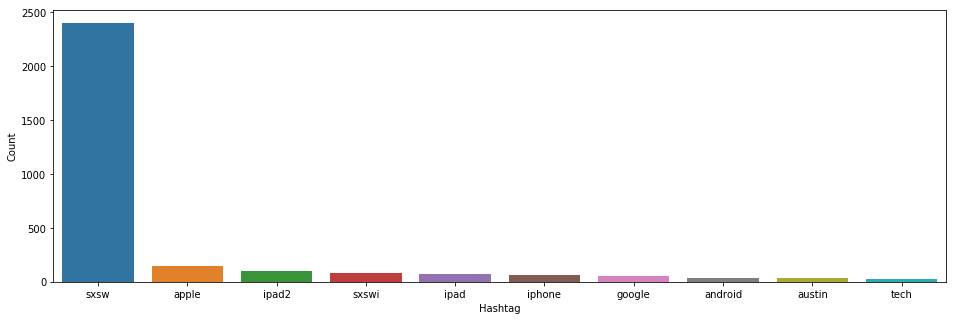

In [46]:
# extracting hashtags from postive catergory

HT_pos = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 2.0])
HT_pos = sum(HT_pos,[])
HT_pos = [item.lower() for item in HT_pos]

a = nltk.FreqDist(HT_pos)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

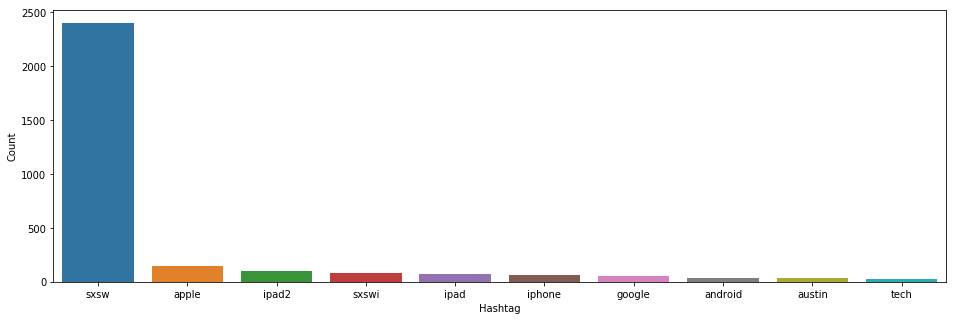

,Hashtag,Count
0,sxsw,2398
4,apple,144
12,ipad2,103
11,sxswi,80
6,ipad,73
40,iphone,62
21,google,54
9,android,35
35,austin,33
7,tech,22


In [57]:
# extracting hashtags from can't tell catergory

HT_ct = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 2.0])
HT_ct = sum(HT_ct,[])
HT_ct = [item.lower() for item in HT_ct]

a = nltk.FreqDist(HT_ct)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
d